In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:

def get_winrates(path):
    with open(path, 'r') as file:
        lines = file.readlines()

    # Initialize an empty list to store the winrate values
    winrates = []

    # Iterate through each line to extract the winrate values
    for line in lines:
        if 'Winrate' in line:
            # Extract the winrate value
            winrate = float(line.split(': ')[1].strip())
            # Append the rounded winrate to the list
            winrates.append(round(winrate, 2))

    # Print the list of rounded winrate values
    return winrates

def plot_winrates(winrates, ban):
    matches = list(range(1, len(winrates) + 1))

    # Plotting the winrate values
    plt.figure(figsize=(10, 6))
    plt.plot(matches, winrates, marker='o', linestyle='-', color='b', label='Winrate')

    # Identify the highest and lowest winrates
    max_winrate = max(winrates)
    min_winrate = min(winrates)
    max_index = winrates.index(max_winrate) + 1  # +1 to match the match numbers
    min_index = winrates.index(min_winrate) + 1

    # Calculate the mean winrate
    mean_winrate = np.mean(winrates)

    # Annotating the highest winrate
    plt.annotate(f'Highest: {max_winrate}%', xy=(max_index, max_winrate), 
                 xytext=(max_index, max_winrate + 5),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 ha='center')

    # Annotating the lowest winrate
    plt.annotate(f'Lowest: {min_winrate}%', xy=(min_index, min_winrate), 
                 xytext=(min_index, min_winrate - 10),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 ha='center')

    # Draw and annotate the mean winrate
    plt.axhline(mean_winrate, color='orange', linestyle='--', label=f'Mean: {round(mean_winrate, 2)}%')
    plt.annotate(f'Mean: {round(mean_winrate, 2)}%', xy=(1, mean_winrate), 
                 xytext=(1, mean_winrate + 5),
                 arrowprops=dict(facecolor='orange', arrowstyle='->'),
                 ha='center')

    # Adding titles and labels
    plt.title(f'{ban}: Winrates Across Matches')
    plt.xlabel('Match Number')
    plt.ylabel('Winrate (%)')
    plt.xticks(matches)  # Set the x-ticks to match numbers
    plt.ylim(0, 100)  # Assuming winrates are percentages
    plt.grid(True)

    # Show the plot
    plt.show()

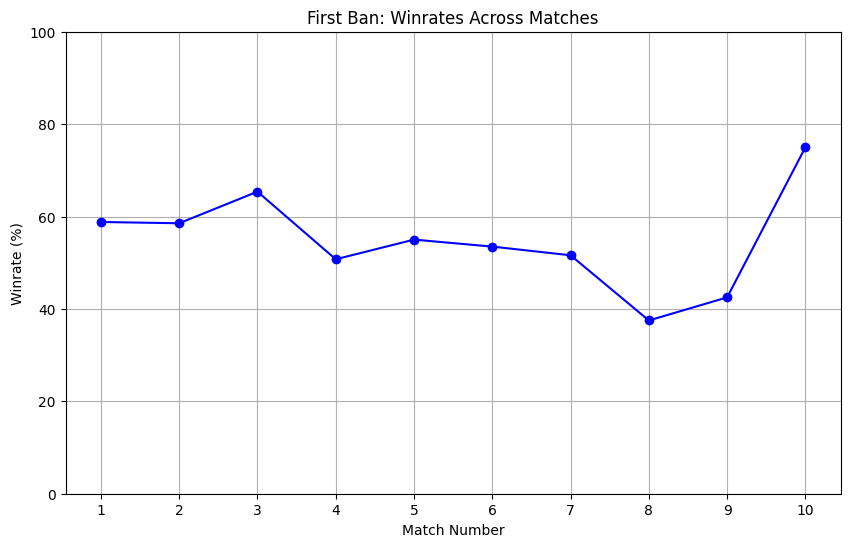

In [16]:
first_ban = get_winrates("results.txt")
plot_winrates(first_ban,"First Ban")